# Ejemplo de uso del modelo K-Means
se genera un dataset 2-dimensional para enfatizar que es un modelo no supervisado

In [1]:
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt

In [12]:
X,y_true = make_blobs(n_samples=300,centers=4,cluster_std=0.60,random_state=0)

Text(0.5,1,'Distribución de los datos')

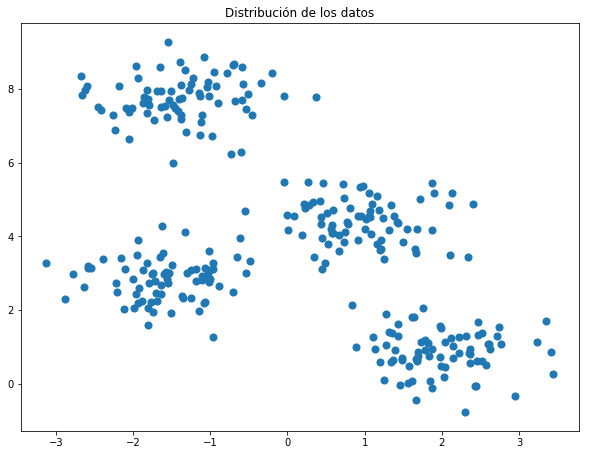

In [17]:
fig = plt.gcf()
fig.set_size_inches(10,7.5)
plt.scatter( X[:,0],X[:,1],s=50 )
plt.title('Distribución de los datos')

Facilmente podemos observar que se forman 4 clusters, pero k-means hace esto automaticamente usando un estimador
ahora implementaremos el algoritmo k-means

In [18]:
from sklearn.cluster import KMeans

In [19]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

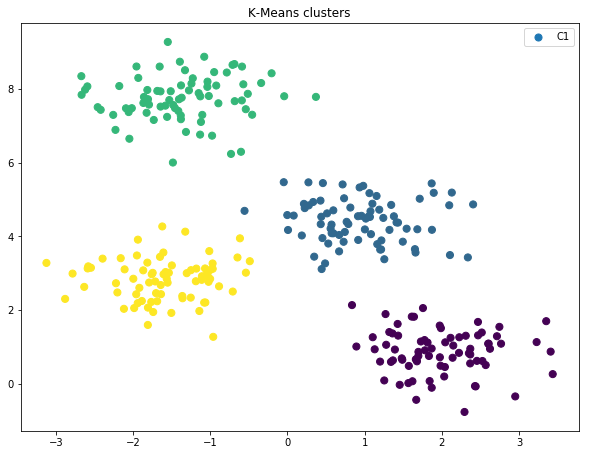

In [28]:
fig_2 = plt.gcf()
fig_2.set_size_inches(10,7.5)
plt.scatter(X[:,0],X[:,1],c=y_kmeans,s=50,cmap='viridis')
plt.title('K-Means clusters')
plt.legend(['C1','C2','C3','C4'],loc='best')
plt.show()

# Aplicando k-means a base de datos iris plant

In [98]:
import pandas as pd
import numpy as np

In [41]:
iris = pd.read_csv('../datasets/iris_plant/PCA_iris_plant.csv')

In [52]:
X,y= iris[["x1","x2"]],[iris[["variety"]]]

Text(0,0.5,'y2')

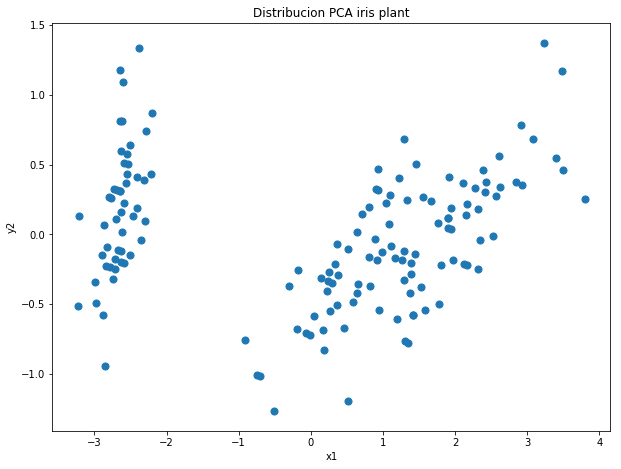

In [58]:
fig_3 = plt.gcf()
fig_3.set_size_inches(10,7.5)
plt.scatter(X["x1"],X["x2"],s=50)
plt.title('Distribucion PCA iris plant')
plt.xlabel('x1')
plt.ylabel('y2')

# Aplicando K-Means a iris plant

buscando el numero correcto de cluster para aplicar k-means usando el metodo del codo

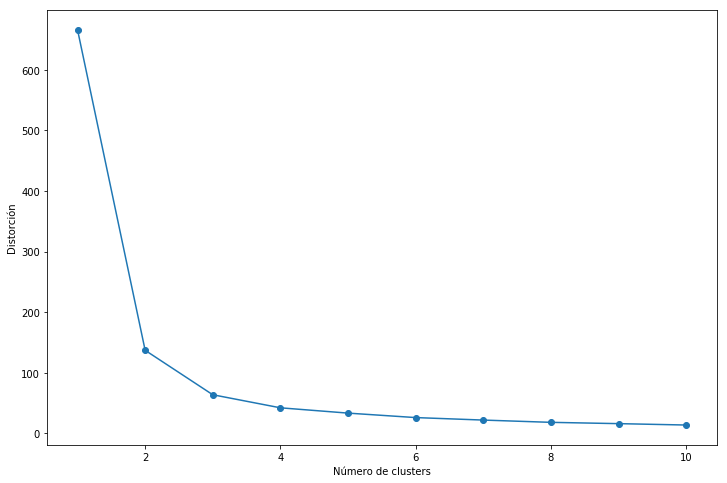

In [61]:
distortions = []
for i in range(1,11):
    km = KMeans(n_clusters=i,init='k-means++',n_init=10,max_iter=300,random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)
fig_4 = plt.gcf()
fig_4.set_size_inches(12,8)
plt.plot(range(1,11),distortions,marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('Distorción')
plt.show()

In [87]:
kmeans_ip = KMeans(n_clusters=3)
kmeans_ip.fit(X)
y_kmeans = kmeans_ip.predict(X)

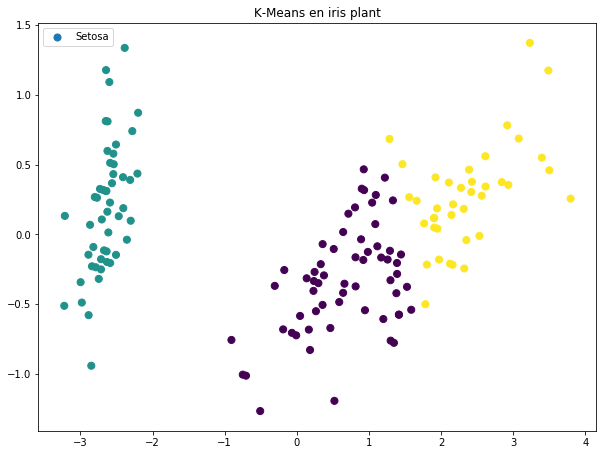

In [90]:
fig_5 = plt.gcf()
fig_5.set_size_inches(10,7.5)
plt.scatter(x=X["x1"],y=X["x2"],c=y_kmeans,s=50,cmap='viridis')
plt.legend(["Setosa","Versicolor","Virginica"],loc='best')
plt.title('K-Means en iris plant')
plt.show()

# Aplicando K-Means en Base de datos Health

In [93]:
health = pd.read_excel('../datasets/health-DS/health-ds2.xlsx')

In [111]:
X,y = health[['EDAD','ESTATURA','PESO','CINTURA','PULSO','SYS','DIAS','COLESTEROL','IMC','MUSLO','CODO','MUÑECA','BRAZO']],health[['SEXO']]

In [102]:
from sklearn.preprocessing import StandardScaler

In [103]:
sc = StandardScaler()

In [113]:
X_std = sc.fit_transform(X)

In [115]:
cov_matrix = np.cov(X_std.T)

In [117]:
eig_vals,eig_vecs = np.linalg.eig(cov_matrix)
print('\nEigenvalues \n%s' % eig_vals)


Eigenvalues 
[6.10139168e+00 2.29608123e+00 1.18430168e+00 9.78445969e-01
 8.20230020e-01 6.24868550e-01 4.45134245e-01 3.77899846e-03
 5.25628379e-02 6.97039274e-02 2.28365569e-01 1.93319775e-01
 1.66372477e-01]


In [119]:
#basados en los top  eigvecs, mostramos los mas informativos con una explicacion de varianzas
tot = sum(eig_vals)
var_exp = [(i/tot) for i in sorted(eig_vals,reverse=True)]
cum_var_exp = np.cumsum(var_exp)

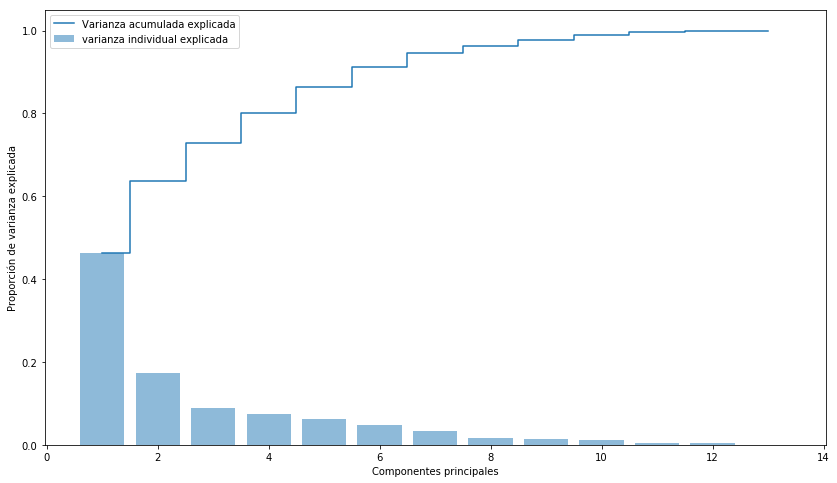

In [120]:
fig_6= plt.gcf()
#guardar fig en una ruta
#fig.savefig('test2png.png', dpi=100)
fig_6.set_size_inches(14,8)
plt.bar(range(1,14),var_exp,alpha=0.5,align='center',label='varianza individual explicada')
plt.step(range(1,14),cum_var_exp,where='mid',label='Varianza acumulada explicada')
plt.ylabel('Proporción de varianza explicada')
plt.xlabel('Componentes principales')
plt.legend(loc='best') #buen truco para poner los legends
plt.show()

In [122]:
from sklearn.decomposition import PCA

In [127]:
pca = PCA(n_components=2)

In [128]:
X_reduced = pca.fit_transform(X_std)

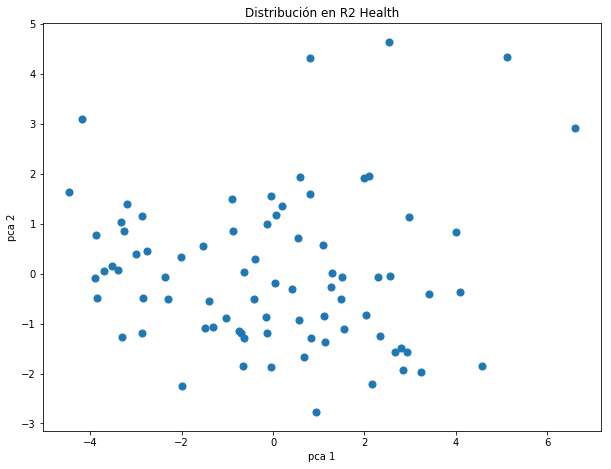

In [137]:
fig_7 = plt.gcf()
fig_7.set_size_inches(10,7.5)
plt.scatter(x=X_reduced[:,0],y=X_reduced[:,1],s=50)
plt.title('Distribución en R2 Health')
plt.xlabel('pca 1')
plt.ylabel('pca 2')
plt.show()

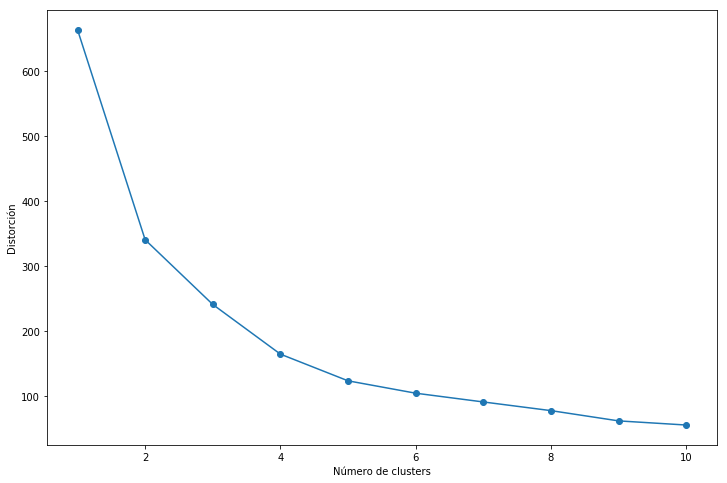

In [138]:
#eleccion numero de clusters
distortions = []
for i in range(1,11):
    km = KMeans(n_clusters=i,init='k-means++',n_init=10,max_iter=300,random_state=0)
    km.fit(X_reduced)
    distortions.append(km.inertia_)
fig_8 = plt.gcf()
fig_8.set_size_inches(12,8)
plt.plot(range(1,11),distortions,marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('Distorción')
plt.show()

In [143]:
kmeans_health = KMeans(n_clusters=2)
kmeans_health.fit(X_reduced)
y_kmeans = kmeans_health.predict(X_reduced)

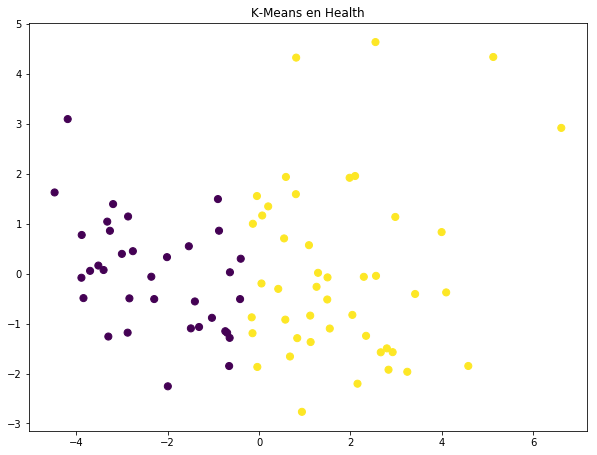

In [144]:
fig_9 = plt.gcf()
fig_9.set_size_inches(10,7.5)
plt.scatter(x=X_reduced[:,0],y=X_reduced[:,1],c=y_kmeans,s=50,cmap='viridis')
plt.title('K-Means en Health')
plt.show()

In [147]:
H,M = health[health['SEXO']=='M'],health[health['SEXO']=='F']

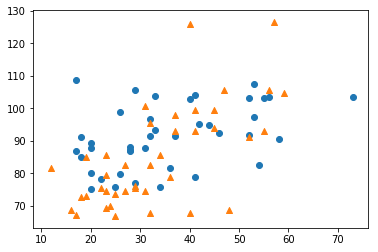

In [152]:
plt.scatter(x=H["EDAD"],y=H["CINTURA"],marker='o')
plt.scatter(x=M["EDAD"],y=M["CINTURA"],marker='^')